In [73]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

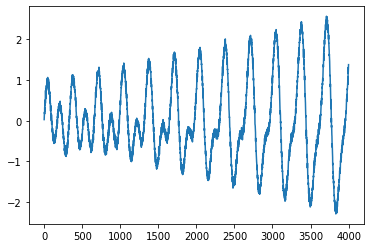

In [74]:
time_series_length = 4000
t = np.linspace(0, 75, time_series_length)
ts = t * np.cos(t) / 4 + 6 * np.sin(t*2) + np.cos(t) / 7 + 3 * np.sin(t) + 0.5 * np.random.standard_normal(size=time_series_length)
ts_norm = (ts - np.mean(ts)) / np.std(ts)
plt.plot(ts_norm)

In [75]:
train, test = train_test_split(ts_norm, train_size=0.5, shuffle=False)

In [76]:
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps)]
        x.append(a)
        y.append(dataset[i + time_steps])
    return np.array(x), np.array(y)

In [77]:
n_time_steps = 10

x_train, y_train = create_dataset(train, n_time_steps)
x_test, y_test = create_dataset(test, n_time_steps)
n_inputs = 1

x_train = np.reshape(x_train, (x_train.shape[0], n_time_steps, n_inputs))
x_test = np.reshape(x_test, (x_test.shape[0], n_time_steps, n_inputs))

In [78]:
model = keras.Sequential()
model.add(layers.LSTM(100, input_shape=(n_time_steps, n_inputs), return_sequences=False))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100)               40800     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=2)

Epoch 1/5
63/63 - 2s - loss: 0.0516 - 2s/epoch - 39ms/step
Epoch 2/5
63/63 - 1s - loss: 0.0124 - 550ms/epoch - 9ms/step
Epoch 3/5
63/63 - 1s - loss: 0.0103 - 534ms/epoch - 8ms/step
Epoch 4/5
63/63 - 0s - loss: 0.0073 - 470ms/epoch - 7ms/step
Epoch 5/5
63/63 - 1s - loss: 0.0063 - 542ms/epoch - 9ms/step


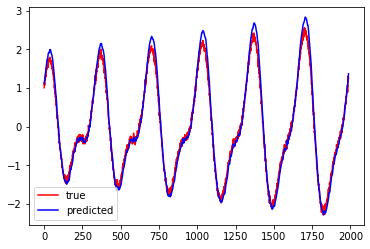

In [80]:
y_pred = model.predict(x_test)
plt.plot(y_test, 'r', label = 'true')
plt.plot(y_pred, 'b', label = 'predicted')
plt.legend()